# Weekend Movie Trip

__Dataset Summary__ -
MovieLens-100K Dataset describes ratings given by various users to various movies from MovieLens, a movie recommendation service. It contains 100,000 ratings from 1000 users on 1700 movies. The dataset was released on 4/1998.
<br>
<br>
Users were selected at random for inclusion. All selected users had rated at least 1 movies. Each user is represented by an id, age, sex, occupation and zipcode. The data are contained in the files u.data(ratings information), u.user(user information), u.item(movies information).
<br>
<br>
This dataset can be downloaded at https://grouplens.org/datasets/movielens/100k/.


In this notebook, I have used K-Means clustering approach to find the common clusters in order to recommend similar interest movies to the users.

References:
<br>
https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_groups/
<br>
https://github.com/st186/Weather-Data-Clustering-Using-k-means/blob/master/Weather_Data_Clustering_Using_K-Means.ipynb
<br>
https://www.kaggle.com/ainslie/credit-card-data-clustering-analysis/notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv('/Users/nidhimidha/Desktop/Movie_Weekend/Movie_Weekend/data/external/ml-100k/u.user', low_memory=False)
list(users)



['1|24|M|technician|85711']

In [3]:
users = pd.read_csv('/Users/nidhimidha/Desktop/Movie_Weekend/Movie_Weekend/data/external/ml-100k/u.user', sep='|', low_memory=False)
users.head()

,1,24,M,technician,85711
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101


In [4]:
users.columns = ['user_id', 'age', 'sex', 'occupation', 'zipcode']
users.head()

,user_id,age,sex,occupation,zipcode
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101


In [5]:
users = users.drop(columns=['age','occupation','zipcode'])

In [6]:
movies_cols = ['movie_id', 'movie_title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'FilmNoir', 'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western']

movies = pd.read_csv('/Users/nidhimidha/Desktop/Movie_Weekend/Movie_Weekend/data/external/ml-100k/u.item', sep='|',  
                    encoding='latin-1', low_memory=False, names = movies_cols)
movies.head(3)


,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
#Uncomment it later
#movies['genre'] = movies[movies.columns[6:]].apply(lambda x: ','.join(x.astype(int).astype(str)),axis=1)

In [8]:
movies.head(3)

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie_id              1682 non-null int64
movie_title           1682 non-null object
release date          1681 non-null object
video release date    0 non-null float64
IMDb URL              1679 non-null object
unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
Animation             1682 non-null int64
Children              1682 non-null int64
Comedy                1682 non-null int64
Crime                 1682 non-null int64
Documentary           1682 non-null int64
Drama                 1682 non-null int64
Fantasy               1682 non-null int64
FilmNoir              1682 non-null int64
Horror                1682 non-null int64
Musical               1682 non-null int64
Mystery               1682 non-null int64
Romance               1682 non-null int64
SciFi                 1682 non-null int64
Thriller 

In [10]:
ratings = pd.read_csv('/Users/nidhimidha/Desktop/Movie_Weekend/Movie_Weekend/data/external/ml-100k/u.data', encoding='latin-1', low_memory=False)
ratings.head()



,196 242 3 881250949
0,186\t302\t3\t891717742
1,22\t377\t1\t878887116
2,244\t51\t2\t880606923
3,166\t346\t1\t886397596
4,298\t474\t4\t884182806


In [11]:
ratings = pd.read_csv('/Users/nidhimidha/Desktop/Movie_Weekend/Movie_Weekend/data/external/ml-100k/u.data', sep='\t',  encoding='latin-1', low_memory=False)
ratings.head()



,196,242,3,881250949
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [12]:
ratings.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings.head()



,user_id,movie_id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
user_id      99999 non-null int64
movie_id     99999 non-null int64
rating       99999 non-null int64
timestamp    99999 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [14]:
# Unique Users and Movies

print("Unique UserID count: %s" % str(ratings.user_id.nunique()))
print("Unique MovieID count: %s" % str(ratings.movie_id.nunique()))

Unique UserID count: 943
Unique MovieID count: 1682


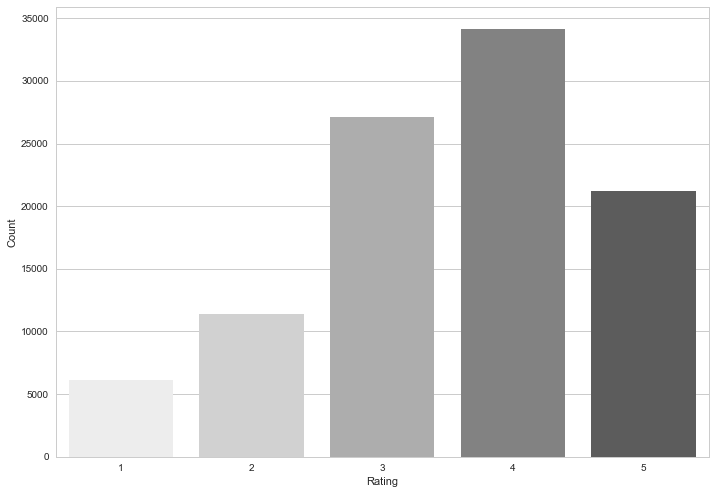

In [15]:
# Rating frequency

sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.set_style('whitegrid')
ax = sns.countplot(x='rating', data=ratings, palette=sns.color_palette('Greys'))
ax.set(xlabel='Rating', ylabel='Count')
plt.show()

In [16]:
avg_user_ratings_df = ratings.groupby(['user_id'], as_index=False)['rating'].mean()
avg_user_ratings_df.head()

,user_id,rating
0,1,3.610294
1,2,3.709677
2,3,2.796296
3,4,4.333333
4,5,2.874286


In [17]:
avg_user_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 942
Data columns (total 2 columns):
user_id    943 non-null int64
rating     943 non-null float64
dtypes: float64(1), int64(1)
memory usage: 22.1 KB


In [18]:
avg_movie_ratings_df = ratings.groupby(['movie_id'], as_index=False)['rating'].mean()
avg_movie_ratings_df.head()

,movie_id,rating
0,1,3.878319
1,2,3.206107
2,3,3.033333
3,4,3.550239
4,5,3.302326


In [19]:
avg_movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 0 to 1681
Data columns (total 2 columns):
movie_id    1682 non-null int64
rating      1682 non-null float64
dtypes: float64(1), int64(1)
memory usage: 39.4 KB


In [20]:
ratings = ratings.drop(columns=['timestamp'])

In [21]:
movie_ratings_df= pd.merge(movies, avg_movie_ratings_df, on='movie_id')

In [22]:
movie_ratings_df.head()

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,rating
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3.878319
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,3.206107
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.033333
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.550239
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.302326


In [23]:
movie_ratings_df.head(3)

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,rating
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3.878319
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,3.206107
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.033333


In [24]:
movie_user_rating_df = pd.merge(movie_ratings_df,ratings,on='movie_id')

In [25]:
movie_user_rating_df.head(3)

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Musical,Mystery,Romance,SciFi,Thriller,War,Western,rating_x,user_id,rating_y
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,3.878319,308,4
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,3.878319,287,5
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,3.878319,148,4


In [26]:
avg_movie_user_rating_df=pd.merge(movie_user_rating_df,avg_user_ratings_df,on='user_id')

In [27]:
avg_movie_user_rating_df.head(3)

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Mystery,Romance,SciFi,Thriller,War,Western,rating_x,user_id,rating_y,rating
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,3.878319,308,4,3.758186
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,3.550239,308,5,3.758186
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,1,0,0,3.302326,308,4,3.758186


In [28]:
avg_movie_user_rating_df = avg_movie_user_rating_df.rename(columns={'rating_x': 'avg_movie_rating', 'rating': 'avg_user_rating'})


avg_movie_user_rating_df= avg_movie_user_rating_df.drop(columns=['rating_y'])

In [29]:
avg_movie_user_rating_df.head(3)

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Musical,Mystery,Romance,SciFi,Thriller,War,Western,avg_movie_rating,user_id,avg_user_rating
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,3.878319,308,3.758186
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,3.550239,308,3.758186
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,1,0,0,3.302326,308,3.758186


In [30]:
#Finding euclidean distances

In [31]:
avg_movie_user_rating_df['distance_bw_genres_movierating_userrating'] = avg_movie_user_rating_df.apply(lambda row: np.sqrt(
    np.sum(
        [np.square(row.Action), np.square(row.Adventure), np.square(row.Animation),np.square(row.Children),
         np.square(row.Comedy), np.square(row.Crime), np.square(row.Documentary),np.square(row.Drama),
        np.square(row.Fantasy), np.square(row.FilmNoir), np.square(row.Horror),np.square(row.Musical),
        np.square(row.Mystery), np.square(row.Romance), np.square(row.SciFi),np.square(row.Thriller),
        np.square(row.War), np.square(row.Western), np.square(row.avg_movie_rating), np.square(row.avg_user_rating)]
    )
), axis=1)


In [32]:
avg_movie_user_rating_df['distance_bw_genres_userrating'] = avg_movie_user_rating_df.apply(lambda row: np.sqrt(
    np.sum(
        [np.square(row.Action), np.square(row.Adventure), np.square(row.Animation),np.square(row.Children),
         np.square(row.Comedy), np.square(row.Crime), np.square(row.Documentary),np.square(row.Drama),
        np.square(row.Fantasy), np.square(row.FilmNoir), np.square(row.Horror),np.square(row.Musical),
        np.square(row.Mystery), np.square(row.Romance), np.square(row.SciFi),np.square(row.Thriller),
        np.square(row.War), np.square(row.Western), np.square(row.avg_user_rating)]
    )
), axis=1)


In [33]:
avg_movie_user_rating_df['distance_bw_genres_movierating'] = avg_movie_user_rating_df.apply(lambda row: np.sqrt(
    np.sum(
        [np.square(row.Action), np.square(row.Adventure), np.square(row.Animation),np.square(row.Children),
         np.square(row.Comedy), np.square(row.Crime), np.square(row.Documentary),np.square(row.Drama),
        np.square(row.Fantasy), np.square(row.FilmNoir), np.square(row.Horror),np.square(row.Musical),
        np.square(row.Mystery), np.square(row.Romance), np.square(row.SciFi),np.square(row.Thriller),
        np.square(row.War), np.square(row.Western), np.square(row.avg_movie_rating)]
    )
), axis=1)


In [34]:
avg_movie_user_rating_df = avg_movie_user_rating_df.drop(columns=['movie_title','release date','video release date','IMDb URL','unknown','Action', 'Adventure',
 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'FilmNoir', 'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western'])

avg_movie_user_rating_df.head(3)

,movie_id,avg_movie_rating,user_id,avg_user_rating,distance_bw_genres_movierating_userrating,distance_bw_genres_userrating,distance_bw_genres_movierating
0,1,3.878319,308,3.758186,5.671448,4.138111,4.247512
1,4,3.550239,308,3.758186,5.452354,4.138111,3.950215
2,5,3.302326,308,3.758186,5.294272,4.138111,3.728988


In [35]:
# Initializing KMeans
kmeans = KMeans(n_clusters=8)
# Fitting with inputs
kmeans = kmeans.fit(avg_movie_user_rating_df)
# Predicting the clusters
labels = kmeans.predict(avg_movie_user_rating_df)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)

[[ 572.40363913    3.49908802  775.34628942    3.51214465    5.17821565
     3.79289595    3.78228136]
 [ 185.51725782    3.65127675  146.0742772     3.56234056    5.33687746
     3.87054539    3.95172945]
 [ 598.07761466    3.45514459  132.22453625    3.54871203    5.17155229
     3.82251936    3.73699465]
 [ 184.0465767     3.66194343  776.68581303    3.51342247    5.3150925
     3.83054913    3.96710883]
 [1068.81036561    3.06717963  284.64657828    3.39543523    4.78859291
     3.64092868    3.33722438]
 [ 564.77189104    3.50997862  419.81689696    3.55209784    5.21075324
     3.82440996    3.78641519]
 [1060.26774744    3.08305698  724.18754266    3.4546792     4.83816772
     3.69802716    3.35740335]
 [ 176.23108519    3.67491997  438.82408722    3.57743931    5.36364863
     3.88619305    3.97620621]]


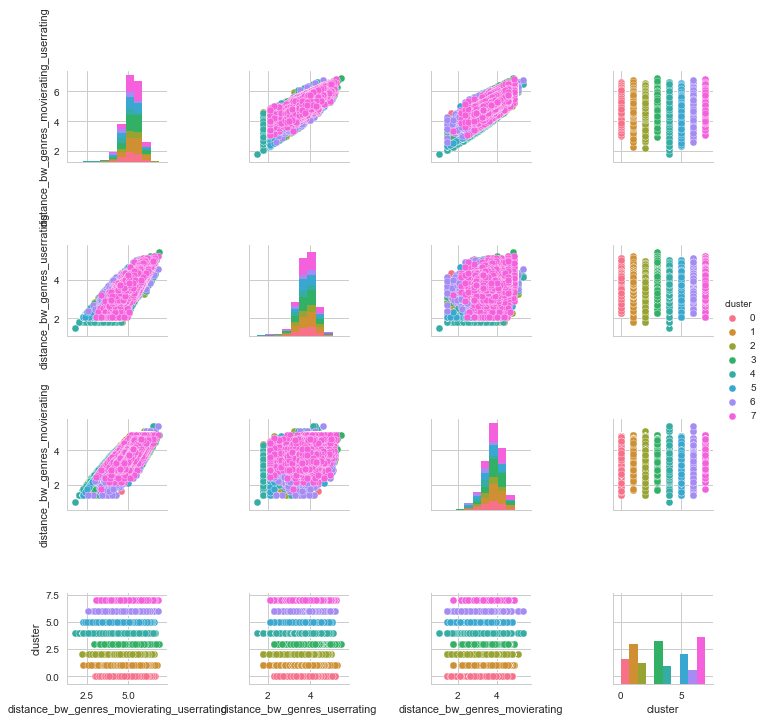

In [36]:
cols = ['distance_bw_genres_movierating_userrating','distance_bw_genres_userrating','distance_bw_genres_movierating']
avg_movie_user_rating_df["cluster"] = labels
cols.append("cluster")
sns.pairplot(avg_movie_user_rating_df[cols], hue="cluster")

By looking at clusters, we may see the similarity between movies accoring to their genres, average movie rating and average user rating.